In [3]:
# Base Work with multiple tables
# merge, join, to_csv, del ['column'], IPython.display

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import time
#from ipython.display import image

In [3]:
#amsterdam_airbnb calendar listings reviews
#df2 = pd.read_csv("amsterdam_airbnb/reviews.csv", nrows=10000)
#df2.to_csv("amsterdam_airbnb/reviews_sample1.csv")
#df2.shape
#df2.head(5)

# del df['column_name']
# df = df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index 
# df.drop('column_name', axis=1, inplace=True
# df = df.drop('column_name', 1)  # '0' for row, '1' for column

In [5]:
reviews = pd.read_csv("data_sets/reviews_sample1_airbnb.csv")
listings = pd.read_csv("data_sets/listings_sample1_airbnb.csv")
calendar = pd.read_csv("data_sets/calendar_sample1_airbnb.csv")

In [7]:
time.sleep(1)
calendar = pd.read_csv("data_sets/calendar_sample1_airbnb.csv")

In [8]:
calendar.head(2)

Unnamed: 0  listing_id        date available    price adjusted_price  \
0           0        2818  2019-12-08         f   $51.00         $51.00   
1           1       58211  2019-12-08         t  $175.00        $175.00   

   minimum_nights  maximum_nights  
0               3            1125  
1               3             365

In [9]:
listings.head(2)

Unnamed: 0     id                         listing_url       scrape_id  \
0           0   2818   https://www.airbnb.com/rooms/2818  20191207212953   
1           1  20168  https://www.airbnb.com/rooms/20168  20191207212953   

  last_scraped                                          name  \
0   2019-12-08      Quiet Garden View Room & Super Fast WiFi   
1   2019-12-08  Studio with private bathroom in the centre 1   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  17th century Dutch townhouse in the heart of t...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  For those who like all facets of city life. In...   

                                         description experiences_offered  ...  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none  ...   
1  17th century Dutch townhouse in the heart of t...                none  ...   

  instant_bookable is_business_travel_ready          cancellation_policy  \
0                t                        f  strict_14_with_grace_period   
1                f                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   

  calculated_host_listings_count  calculated_host_listings_count_entire_homes  \
0                              1                                            0   
1                              2                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             1   
1                                             2   

  calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                           0               2.13  
1                                           0               2.57  

[2 rows x 107 columns]

In [10]:
reviews.head(2)

Unnamed: 0  listing_id    id        date  reviewer_id reviewer_name  \
0           0        2818  1191  2009-03-30        10952           Lam   
1           1        2818  1771  2009-04-24        12798         Alice   

                                            comments  
0  Daniel is really cool. The place was nice and ...  
1  Daniel is the most amazing host! His place is ...

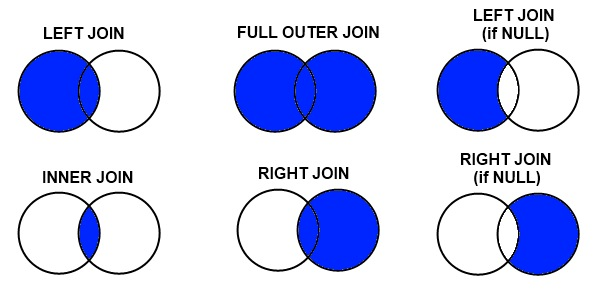

In [11]:
Image("https://www.shanelynn.ie/wp-content/uploads/2017/03/join-types-merge-names.jpg")

In [12]:
#Left Join - by default
pd.merge(listings,reviews, left_on=["id"], right_on=["listing_id"], how="left", indicator=True).head(2) #"inner"."right"..

Unnamed: 0_x  id_x                        listing_url       scrape_id  \
0             0  2818  https://www.airbnb.com/rooms/2818  20191207212953   
1             0  2818  https://www.airbnb.com/rooms/2818  20191207212953   

  last_scraped                                      name  \
0   2019-12-08  Quiet Garden View Room & Super Fast WiFi   
1   2019-12-08  Quiet Garden View Room & Super Fast WiFi   

                                    summary  \
0  Quiet Garden View Room & Super Fast WiFi   
1  Quiet Garden View Room & Super Fast WiFi   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  I'm renting a bedroom (room overlooking the ga...   

                                         description experiences_offered  ...  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none  ...   
1  Quiet Garden View Room & Super Fast WiFi I'm r...                none  ...   

  calculated_host_listings_count_shared_rooms reviews_per_month Unnamed: 0_y  \
0                                           0              2.13          0.0   
1                                           0              2.13          1.0   

  listing_id    id_y        date  reviewer_id  reviewer_name  \
0     2818.0  1191.0  2009-03-30      10952.0            Lam   
1     2818.0  1771.0  2009-04-24      12798.0          Alice   

                                            comments  _merge  
0  Daniel is really cool. The place was nice and ...    both  
1  Daniel is the most amazing host! His place is ...    both  

[2 rows x 115 columns]

In [13]:
# by index -> set index -> join table
#If you don't want to reassign: df.reset_index(drop=True, inplace=True)
calendar.set_index("listing_id", inplace=True) 
reviews.set_index("listing_id", inplace=True) 

In [14]:
calendar.join(reviews, lsuffix="listing_id", rsuffix="listing_id").head(5) 

Unnamed: 0listing_id datelisting_id available   price  \
listing_id                                                          
2818                           0     2019-12-08         f  $51.00   
2818                           0     2019-12-08         f  $51.00   
2818                           0     2019-12-08         f  $51.00   
2818                           0     2019-12-08         f  $51.00   
2818                           0     2019-12-08         f  $51.00   

           adjusted_price  minimum_nights  maximum_nights  \
listing_id                                                  
2818               $51.00               3            1125   
2818               $51.00               3            1125   
2818               $51.00               3            1125   
2818               $51.00               3            1125   
2818               $51.00               3            1125   

            Unnamed: 0listing_id      id datelisting_id  reviewer_id  \
listing_id                                                             
2818                         0.0  1191.0     2009-03-30      10952.0   
2818                         1.0  1771.0     2009-04-24      12798.0   
2818                         2.0  1989.0     2009-05-03      11869.0   
2818                         3.0  2797.0     2009-05-18      14064.0   
2818                         4.0  3151.0     2009-05-25      17977.0   

           reviewer_name                                           comments  
listing_id                                                                   
2818                 Lam  Daniel is really cool. The place was nice and ...  
2818               Alice  Daniel is the most amazing host! His place is ...  
2818             Natalja  We had such a great time in Amsterdam. Daniel ...  
2818             Enrique  Very professional operation. Room is very clea...  
2818             Sherwin  Daniel is highly recommended.  He provided all...

In [ ]:
################################################################################################################

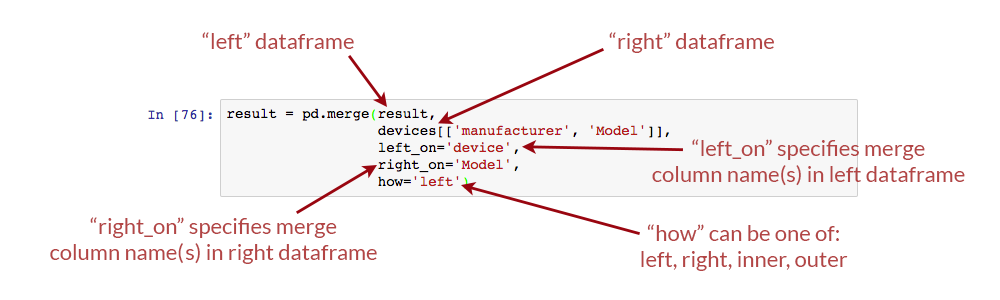

In [15]:
Image("https://www.shanelynn.ie/wp-content/uploads/2017/03/pandas-merge-join-different-variable-names-copy.png")

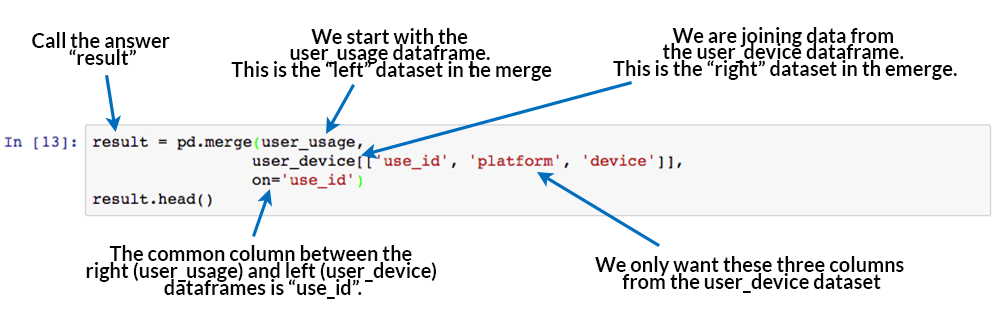

In [16]:
Image("https://www.shanelynn.ie/wp-content/uploads/2017/02/pd-merge_intro_image.png")